In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker, cm
from mpl_toolkits import mplot3d

from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

%matplotlib inline

In [2]:
X = np.array([[3, 4],
     [2.92, 3.74],
     [2.79, 3.51],
     [2.67, 3.23],
     [2.52, 2.99],
     [2.37, 2.75],
     [2.34, 2.47],
     [2.52, 2.2],
     [2.73, 2.01],
     [3.06, 1.83],
     [3.24, 1.63],
     [3.54, 1.39],
     [3.79, 1.11],
     [3.94, 0.7],
     [4.2, 0.63],
     [4.40, 0],
     [4.24, 0.27],
              
     [3.58, 4.01],
     [3.46, 3.75],
     [3.39, 3.53],
     [3.33, 3.39],
     [3.21, 3.05],
     [3.01, 2.73],
     [3.1, 2.41], 
     [3.42, 2.2],
     [3.84, 1.99],
     [4.12, 1.68],
     [4.39, 1.36],
     [4.69, 1.12],
     [4.87, 0.87],
     [5.07, 0.57],
     [5.27, 0.09],
])

y = [0] * 17
y.extend([1] * 15)

y = np.array(y)
print(len(X), len(y))

32 32


In [3]:
h = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)
x_min, x_max = 0, 8
y_min, y_max = 0, 4
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                 np.arange(y_min, y_max, h))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [4]:
alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(make_pipeline(
        StandardScaler(),
        MLPClassifier(
            solver='lbfgs', alpha=alpha, random_state=1, max_iter=2000,
            early_stopping=True, hidden_layer_sizes=[100, 100],
        )
    ))
    names.append(f"alpha {alpha:.2f}")

In [5]:
clf = make_pipeline(
        StandardScaler(),
        MLPClassifier(
            solver='lbfgs', alpha=alpha, random_state=1, max_iter=2000,
            early_stopping=True, hidden_layer_sizes=[100, 100],
        ))

clf2 = SVC(gamma=2, C=1)

1.0
[-0.02224916 -0.02224916 -0.02224917 ... -0.02224916 -0.02224916
 -0.02224916]


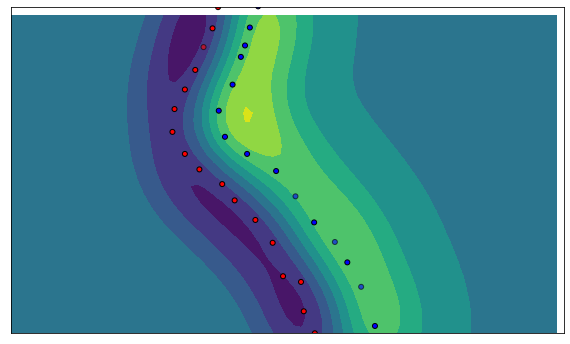

In [24]:
figure = plt.figure(figsize=(8, 6))
ax = plt.subplot()

clf2.fit(X_train, y_train)
score = clf2.score(X_test, y_test)
print(score)
#Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = clf2.decision_function(np.c_[xx.ravel(), yy.ravel()])
print(Z)
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z)


# Plot also the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='black', s=25)
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           alpha=0.6, edgecolors='black', s=25)

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())
#ax.set_title(name)

figure.subplots_adjust(left=.02, right=.98)
plt.show()

In [27]:
S = clf2.decision_function(np.c_[xx.ravel(), yy.ravel()])
print(S)
S = S.reshape(xx.shape)

[-0.02224916 -0.02224916 -0.02224917 ... -0.02224916 -0.02224916
 -0.02224916]


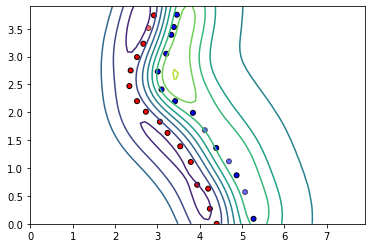

In [28]:
ax = plt.gca()
ax.contour(xx, yy, S)#, cmap = cm_bright)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='black', s=25)
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           alpha=0.6, edgecolors='black', s=25)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
#ax.set_xticks(())
#ax.set_yticks(())
plt.show()

In [29]:
print((Z!=S).sum())

0


In [30]:
print(xx, yy)

[[0.  0.1 0.2 ... 7.7 7.8 7.9]
 [0.  0.1 0.2 ... 7.7 7.8 7.9]
 [0.  0.1 0.2 ... 7.7 7.8 7.9]
 ...
 [0.  0.1 0.2 ... 7.7 7.8 7.9]
 [0.  0.1 0.2 ... 7.7 7.8 7.9]
 [0.  0.1 0.2 ... 7.7 7.8 7.9]] [[0.  0.  0.  ... 0.  0.  0. ]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.2 0.2 0.2 ... 0.2 0.2 0.2]
 ...
 [3.7 3.7 3.7 ... 3.7 3.7 3.7]
 [3.8 3.8 3.8 ... 3.8 3.8 3.8]
 [3.9 3.9 3.9 ... 3.9 3.9 3.9]]


In [31]:
print(S.shape)

(40, 80)


In [32]:
print(S > 0.5)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


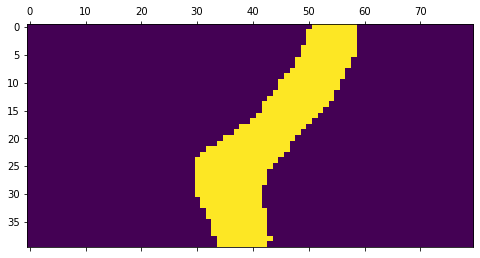

In [33]:
plt.matshow(S>0.5)
plt.show()